In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
print(sys.executable)

df = pd.read_excel("../data/ENB2012_data.xlsx")
df.head()

/opt/miniconda3/envs/ds_class/bin/python


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [2]:
df.shape
df.info()
df.isna().sum().sort_values(ascending=False)
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


np.int64(0)

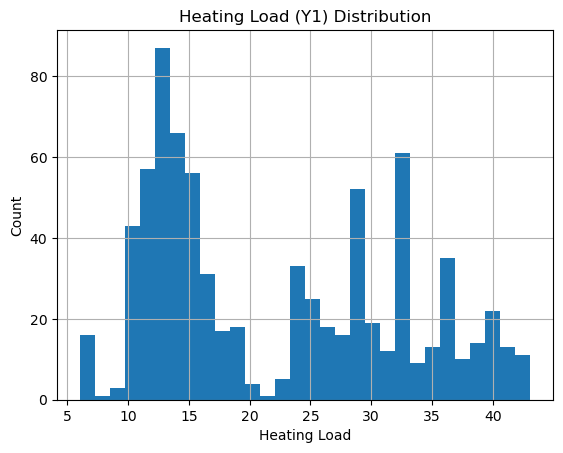

In [3]:
plt.figure()
df["Y1"].hist(bins=30)
plt.title("Heating Load (Y1) Distribution")
plt.xlabel("Heating Load")
plt.ylabel("Count")
plt.show()

In [6]:
import os
import pandas as pd

# --- Paths (works whether your file is in data/raw or data/) ---
path_raw_1 = "../data/raw/ENB2012_data.xlsx"
path_raw_2 = "../data/ENB2012_data.xlsx"

if os.path.exists(path_raw_1):
    file_path = path_raw_1
elif os.path.exists(path_raw_2):
    file_path = path_raw_2
else:
    raise FileNotFoundError("Could not find ENB2012_data.xlsx in ../data/raw/ or ../data/")

df = pd.read_excel(file_path)

# --- Clean column names (removes hidden spaces) ---
df.columns = df.columns.astype(str).str.strip()

# --- Rename columns robustly ---
expected = ["X1","X2","X3","X4","X5","X6","X7","X8","Y1","Y2"]
rename_map = {
    "X1": "relative_compactness",
    "X2": "surface_area",
    "X3": "wall_area",
    "X4": "roof_area",
    "X5": "overall_height",
    "X6": "orientation",
    "X7": "glazing_area",
    "X8": "glazing_area_distribution",
    "Y1": "heating_load",
    "Y2": "cooling_load"
}

# If columns are exactly X1..Y2, rename normally
if all(col in df.columns for col in expected):
    df = df.rename(columns=rename_map)
else:
    # Otherwise, assume the dataset is the first 10 columns in order (common with UCI formatting)
    if df.shape[1] < 10:
        raise ValueError(f"Expected at least 10 columns, but got {df.shape[1]}. Columns: {list(df.columns)}")

    df = df.iloc[:, :10].copy()
    df.columns = list(rename_map.values())

# --- Treat coded columns as categorical ---
df["orientation"] = df["orientation"].astype("category")
df["glazing_area_distribution"] = df["glazing_area_distribution"].astype("category")

# --- Save output ---
os.makedirs("../data/processed", exist_ok=True)
df.to_csv("../data/processed/energy_clean.csv", index=False)

df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


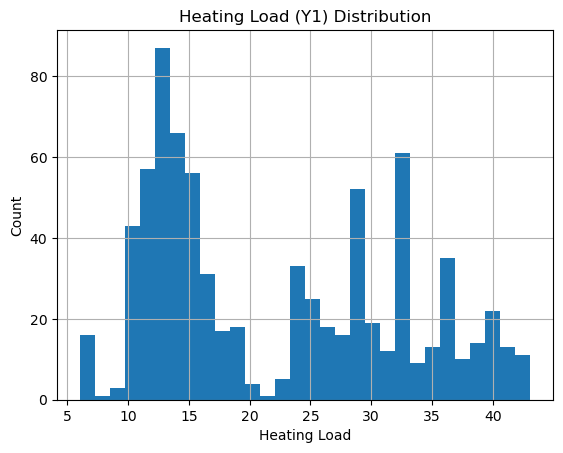

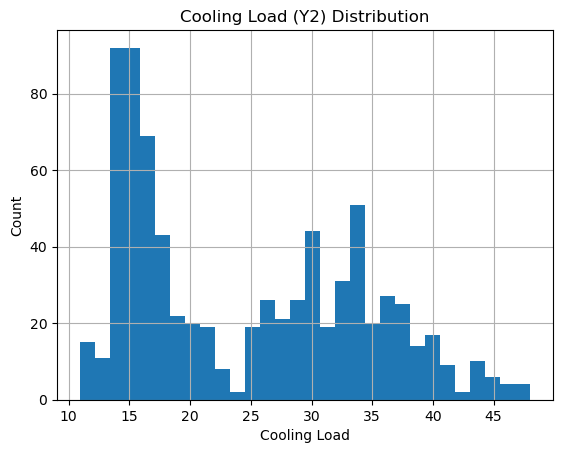

In [8]:
import matplotlib.pyplot as plt

plt.figure()
df["heating_load"].hist(bins=30)
plt.title("Heating Load (Y1) Distribution")
plt.xlabel("Heating Load")
plt.ylabel("Count")
plt.show()

plt.figure()
df["cooling_load"].hist(bins=30)
plt.title("Cooling Load (Y2) Distribution")
plt.xlabel("Cooling Load")
plt.ylabel("Count")
plt.show()

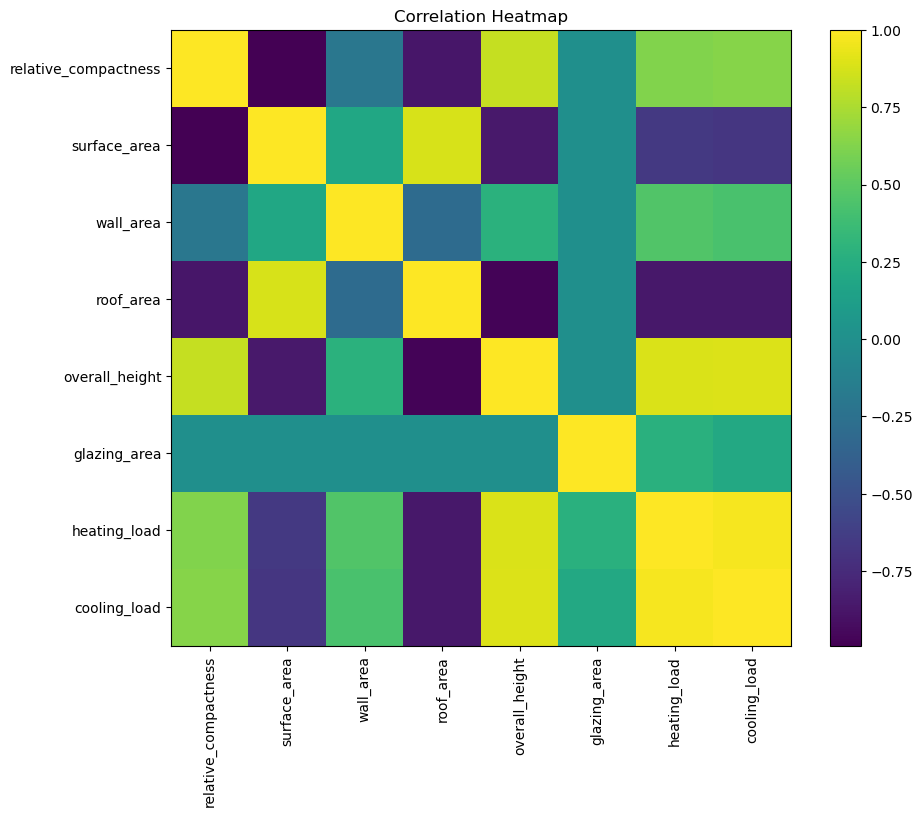

In [9]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()

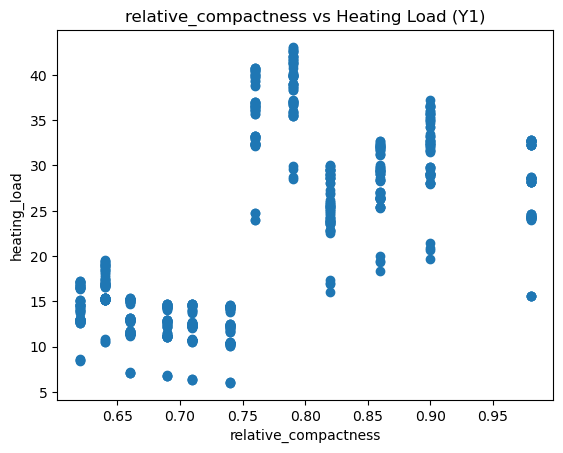

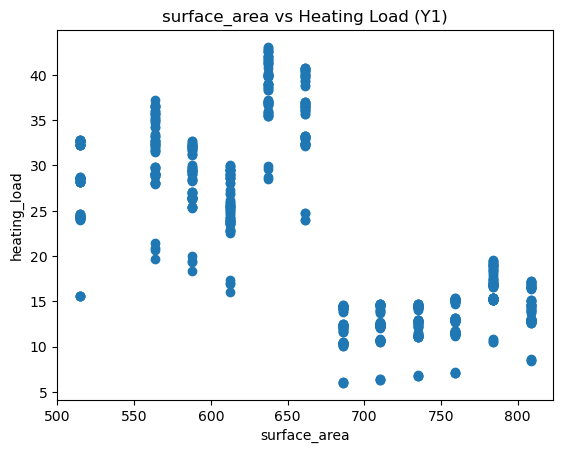

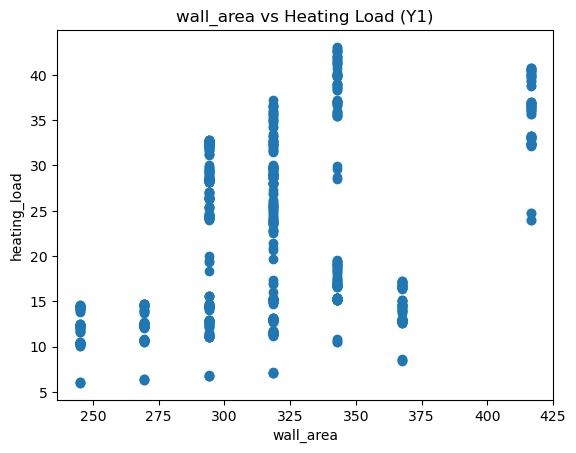

In [13]:
import matplotlib.pyplot as plt

for col in ["relative_compactness", "surface_area", "wall_area"]:
    plt.figure()
    plt.scatter(df[col], df["heating_load"])
    plt.title(f"{col} vs Heating Load (Y1)")
    plt.xlabel(col)
    plt.ylabel("heating_load")
    plt.show()